## ML Project - Bank Marketing Prediction

### Tasks to perform
#### 1 . Read in the file and get basic information about the data, including numerical summaries.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('white')

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('C:\\Users\\Mudigonda\\Documents\\BOARD INFINITY\\Machine learning\\ML Project1_BMP BI\\bank-marketing.csv')
df.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
df.shape

(45211, 19)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   salary     45211 non-null  int64 
 3   marital    45211 non-null  object
 4   education  45211 non-null  object
 5   targeted   45211 non-null  object
 6   default    45211 non-null  object
 7   balance    45211 non-null  int64 
 8   housing    45211 non-null  object
 9   loan       45211 non-null  object
 10  contact    45211 non-null  object
 11  day        45211 non-null  int64 
 12  month      45211 non-null  object
 13  duration   45211 non-null  int64 
 14  campaign   45211 non-null  int64 
 15  pdays      45211 non-null  int64 
 16  previous   45211 non-null  int64 
 17  poutcome   45211 non-null  object
 18  response   45211 non-null  object
dtypes: int64(8), object(11)
memory usage: 6.6+ MB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
salary,45211.0,57006.171065,32085.718415,0.0,20000.0,60000.0,70000.0,120000.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


### - Describe the pdays column, make note of the mean, median and minimum values. Anything fishy in the values?

##### before describing pdays column i have searched it in google what is pdays in bank marketing the results it shown is :
      ## pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted

In [6]:
df['pdays'].describe()

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

yes there is something fishy going on min value is -1 and 75% values are -1

In [7]:
df['pdays'].value_counts()

-1      36954
 182      167
 92       147
 183      126
 91       126
        ...  
 749        1
 717        1
 589        1
 493        1
 32         1
Name: pdays, Length: 559, dtype: int64

we can see more than 35000 vales are -1 this is spoiling overall mean we should drop it.and recheck teh decribe function

### Describe the pdays column again, this time limiting yourself to the relevant values of pdays. How different are the mean and the median values?

as pdays=-1 is person not previously contracted so we have to drop these and see who has been involve in this campaign

In [8]:
df = df.drop(df[df.pdays==-1].index)
df.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
24060,33,admin.,50000,married,tertiary,yes,no,882,no,no,telephone,21,oct,39,1,151,3,failure,no
24062,42,admin.,50000,single,secondary,yes,no,-247,yes,yes,telephone,21,oct,519,1,166,1,other,yes
24064,33,services,70000,married,secondary,yes,no,3444,yes,no,telephone,21,oct,144,1,91,4,failure,yes
24072,36,management,100000,married,tertiary,yes,no,2415,yes,no,telephone,22,oct,73,1,86,4,other,no
24077,36,management,100000,married,tertiary,yes,no,0,yes,no,telephone,23,oct,140,1,143,3,failure,yes


In [9]:
df.shape

(8257, 19)

### Plot a horizontal bar graph with the median values of balance for each education level value. Which group has the highest median?

In [10]:
df.groupby(['education'])['balance'].agg(np.median)

education
primary      520
secondary    527
tertiary     775
unknown      782
Name: balance, dtype: int64

<AxesSubplot:ylabel='education'>

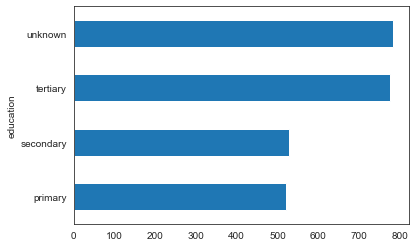

In [11]:
df.groupby(['education'])['balance'].agg(np.median).plot(kind='barh')

so the 'unknown' group has largest median followed by 'tertiary'

### Make a box plot for pdays. Do you see any outliers?

<AxesSubplot:xlabel='pdays'>

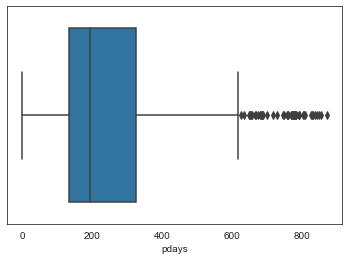

In [12]:
sns.boxplot(df['pdays'])

there are outliers after 600

The final goal is to make a predictive model to predict if the customer will respond positively to the campaign or not. The target variable is “response”.

First, perform bi-variate analysis to identify the features that are directly associated with the target variable. You can refer to the notebook we used for the EDA discussion.

- Convert the response variable to a convenient form
- Make suitable plots for associations with numerical features and categorical features’

### Bivariate Analysis

##### Convert the response variable to a convenient form

In [15]:
mapped={'yes':1,'no':0}
df['response']=df['response'].map(mapped)

In [16]:
df.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
24060,33,admin.,50000,married,tertiary,yes,no,882,no,no,telephone,21,oct,39,1,151,3,failure,0
24062,42,admin.,50000,single,secondary,yes,no,-247,yes,yes,telephone,21,oct,519,1,166,1,other,1
24064,33,services,70000,married,secondary,yes,no,3444,yes,no,telephone,21,oct,144,1,91,4,failure,1
24072,36,management,100000,married,tertiary,yes,no,2415,yes,no,telephone,22,oct,73,1,86,4,other,0
24077,36,management,100000,married,tertiary,yes,no,0,yes,no,telephone,23,oct,140,1,143,3,failure,1


<AxesSubplot:>

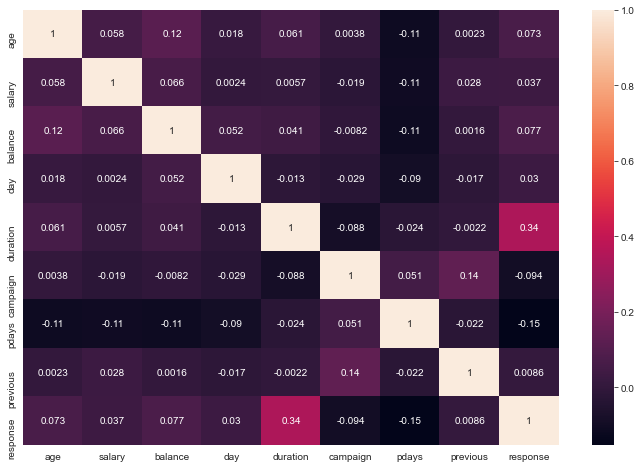

In [17]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True)

In [18]:
all_cols=df.columns
num_cols = df.select_dtypes(include='number').columns.to_list()
cat_cols = list(set(all_cols)- set(num_cols))
print('Numeric columns:\n',cat_cols)
print('categorical columns:\n',num_cols)

Numeric columns:
 ['loan', 'poutcome', 'default', 'contact', 'targeted', 'housing', 'marital', 'job', 'education', 'month']
categorical columns:
 ['age', 'salary', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'response']


## Histogram

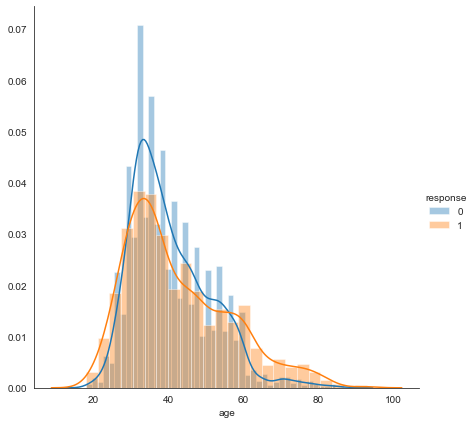

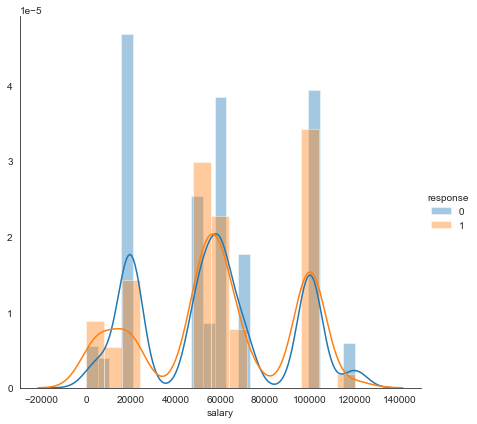

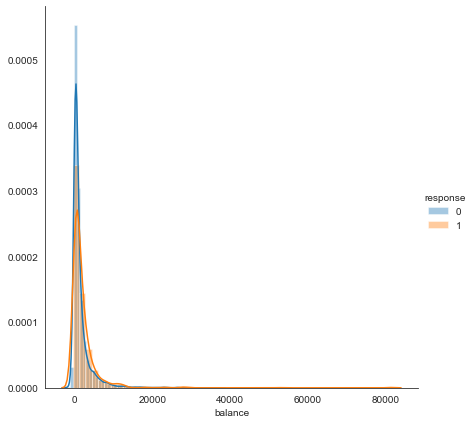

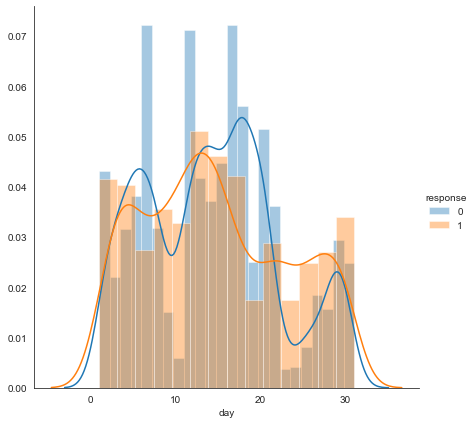

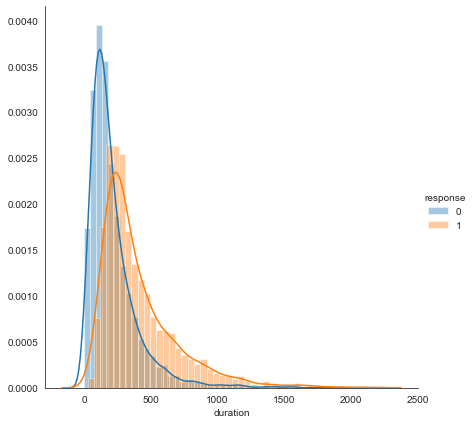

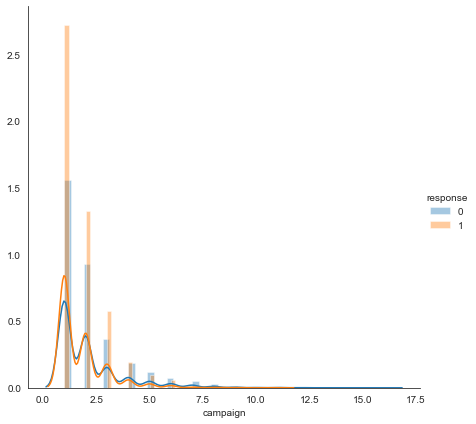

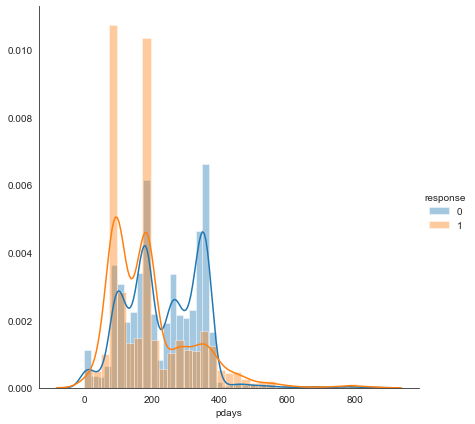

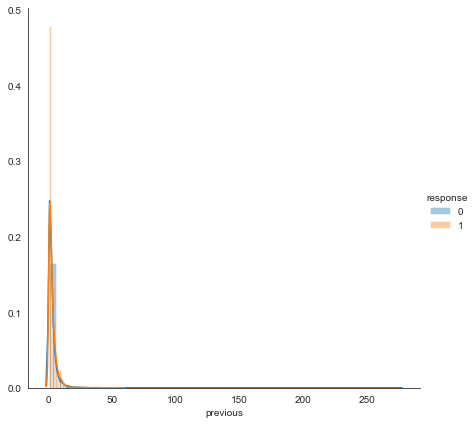

In [19]:
for col in num_cols:
    if col != 'response':
        sns.FacetGrid(df, hue='response', height=6).map(sns.distplot, col).add_legend()

## Boxplot

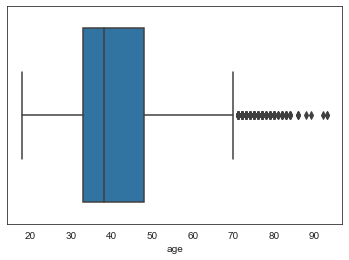

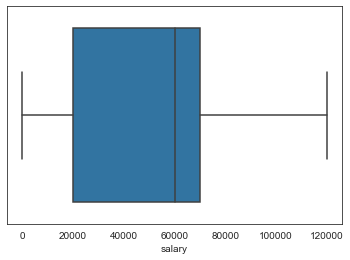

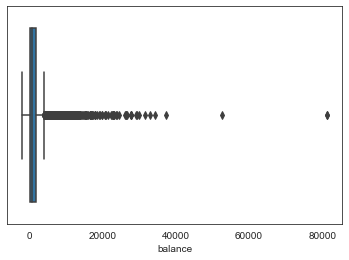

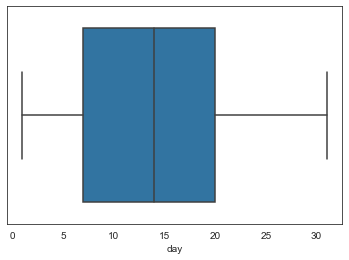

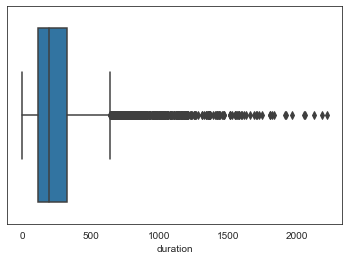

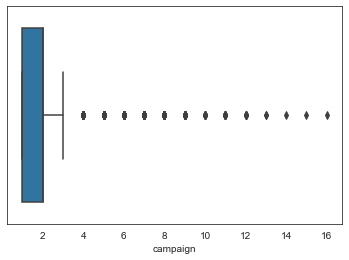

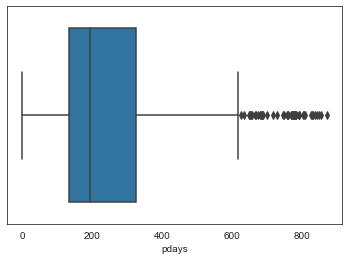

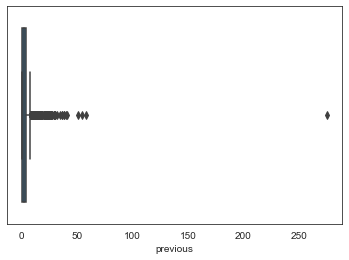

In [20]:
for column in num_cols:
    
    if column != 'response':
        plt.figure()
        sns.boxplot(column,data=df)

In [21]:
# fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 25))

# for ax, col in list(zip(axes.flat, num_cols)):   
#     if col != 'response':    
#         sns.boxplot(col, data=df, ax=ax)

## countplot

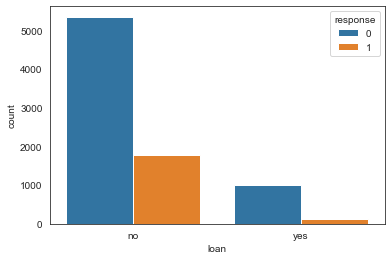

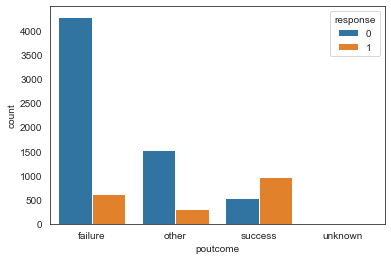

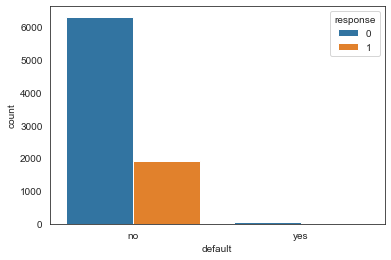

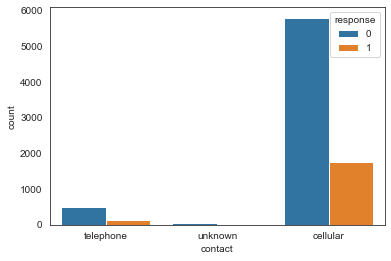

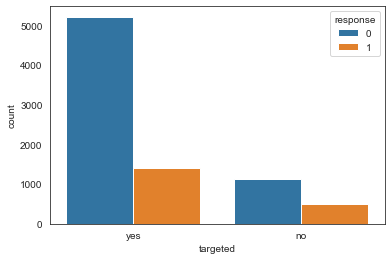

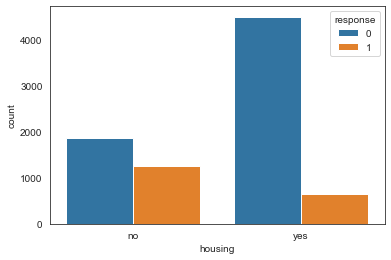

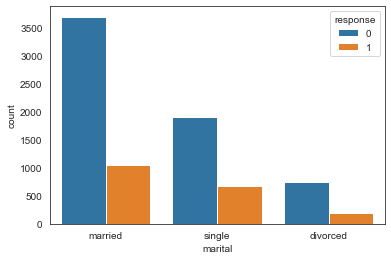

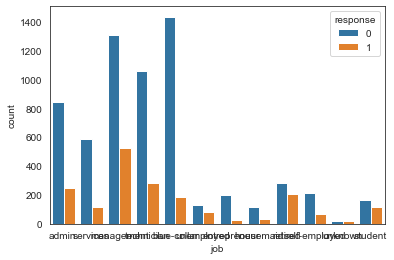

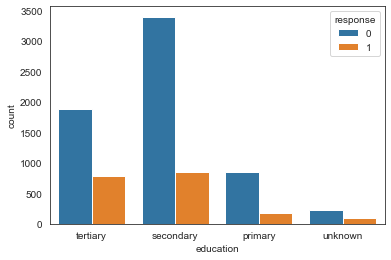

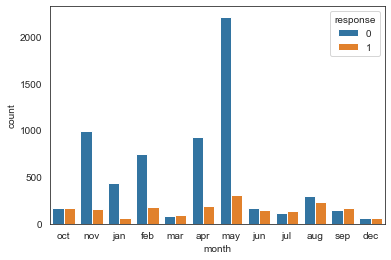

In [22]:
for column in cat_cols:
    
        plt.figure()
        sns.countplot(column,data=df,hue='response')

### Are the features about the previous campaign data useful?

In [23]:
df[num_cols].corr()['response']

age         0.072577
salary      0.036774
balance     0.076995
day         0.029952
duration    0.342610
campaign   -0.094110
pdays      -0.152206
previous    0.008622
response    1.000000
Name: response, dtype: float64

from above previous columns are not highly correlated

### Are pdays and poutcome associated with the target? If yes, and if you plan to use them – how do you handle the pdays column with a value of -1 where the previous campaign data is missing? Explain your approach and your decision.¶

yes if previous campaign has high succes then there is chance to get successful response again.we will use poutcome in our final model.

if pdays = -1, it indicates that this person was not previosly contacted so, i have dropped these records because we want to study on people who was involved in the campaign

### Before the predictive modeling part, make sure to perform –
- The necessary transformations for the categorical variables and the numeric variables
- Handle variables corresponding to the previous campaign

Dropping collumns with unknown values, because those hurts the distributions

In [24]:
df.drop(df[df['poutcome']=='unknown'].index, inplace=True)
df.drop(df[df['contact']=='unknown'].index, inplace=True)
df.drop(df[df['job']=='unknown'].index, inplace=True)

In [25]:
df.job = df.job.str.replace('admin.', 'admin')


Convert Categorical Features into Numerical

In [26]:
df_final = df.copy(deep=True)

In [27]:
from sklearn.preprocessing import LabelEncoder
df_final[cat_cols] = df[cat_cols].apply(LabelEncoder().fit_transform)

In [28]:
df_final.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
24060,33,0,50000,1,2,1,0,882,0,0,1,21,10,39,1,151,3,0,0
24062,42,0,50000,2,1,1,0,-247,1,1,1,21,10,519,1,166,1,1,1
24064,33,7,70000,1,1,1,0,3444,1,0,1,21,10,144,1,91,4,0,1
24072,36,4,100000,1,2,1,0,2415,1,0,1,22,10,73,1,86,4,1,0
24077,36,4,100000,1,2,1,0,0,1,0,1,23,10,140,1,143,3,0,1


### Train-Test Split

In [29]:
X=df_final.drop('response',axis=1)
y=df_final['response']

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=1)


In [31]:
print(X_train.shape)
print(X_test.shape)

(5704, 18)
(2445, 18)


In [32]:
print(y_train.shape)
print(y_test.shape)

(5704,)
(2445,)


## Feature Scaling

In [33]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [36]:
sc.fit(X_train[num_cols[:-1]])    #scaling only numeric columns

StandardScaler()

In [37]:
X_train[num_cols[:-1]] = sc.transform(X_train[num_cols[:-1]])
X_train.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
40491,1.049063,0,-0.250633,2,1,1,0,0.120390,0,0,1,-0.924492,5,-0.763877,-0.053701,-1.328660,0.163412,0
43777,0.961920,0,-0.250633,2,1,1,0,-0.265456,1,0,0,1.224110,8,1.884625,-0.686580,1.395901,1.171091,0
32747,0.526205,0,-0.250633,2,0,1,0,-0.278923,0,0,0,0.339392,0,-0.802510,-0.686580,-0.672247,-0.441195,0
44680,-1.216658,6,0.065422,2,2,0,0,-0.317445,0,0,1,-1.430045,11,1.214987,4.376450,2.178200,-0.239659,0
32910,0.177632,4,1.329641,1,2,1,0,-0.438022,1,0,0,0.339392,0,-0.562127,1.212056,1.027231,-0.441195,1


In [38]:
X_test[num_cols[:-1]] = sc.transform(X_test[num_cols[:-1]])
X_test.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
25359,0.003346,0,-0.250633,1,1,1,0,-0.077231,1,1,0,0.465780,9,0.708467,-0.053701,-0.420473,-0.239659,0
36458,0.526205,0,-0.250633,2,1,1,0,0.746450,1,0,1,-0.418938,8,-0.866898,0.579177,1.000255,-0.038124,1
35041,-1.216658,8,-1.704486,2,1,1,0,0.476796,1,0,1,-1.050880,8,-0.849728,1.212056,1.207070,-0.441195,0
32655,-0.345227,9,0.065422,1,1,1,0,-0.521017,1,0,0,0.339392,0,2.837571,-0.053701,0.361827,-0.038124,0
35572,0.177632,0,-0.250633,0,1,1,0,-0.447105,1,0,0,-0.924492,8,0.060292,0.579177,1.216062,-0.239659,0


## Predictive model 1: Logistic regression
- Make a predictive model using logistic regression
- Use RFE to select top n features in an automated fashion (choose n as you see fit)
- Using p values and VIF, get rid of the redundant features
- Estimate the model performance using k fold cross validation
- What is the precision, recall, accuracy of your model?
- Which features are the most important from your model?

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,recall_score, classification_report
from sklearn.model_selection import cross_val_score

In [40]:
lgr = LogisticRegression()

In [41]:
lgr.fit(X_train, y_train)

LogisticRegression()

In [42]:
y_pred = lgr.predict(X_test)

In [44]:
accuracy_score(y_pred, y_test)

0.8253578732106339

In [45]:
precision_score(y_pred,y_test)

0.5051369863013698

In [47]:
recall_score(y_pred,y_test)

0.6812933025404158

In [51]:
print(classification_report(y_pred,y_test)

              precision    recall  f1-score   support

           0       0.93      0.86      0.89      2012
           1       0.51      0.68      0.58       433

    accuracy                           0.83      2445
   macro avg       0.72      0.77      0.73      2445
weighted avg       0.85      0.83      0.83      2445



In [52]:
confusion_matrix(y_pred,y_test)

array([[1723,  289],
       [ 138,  295]], dtype=int64)

In [53]:
cross_val_score(lgr,X,y,cv=5)

array([0.79509202, 0.72331288, 0.77791411, 0.77361963, 0.73296501])

Use RFE to select top n features in an automated fashion (choose n as you see fit)

In [54]:
from sklearn.feature_selection import RFE
rfe = RFE(lgr, 15)

In [55]:
rfe = rfe.fit(X_train, y_train)
ranks = rfe.ranking_
ranks

array([1, 3, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1])


The higher values mean that they were dropped at the early stage and the smaller values mean that they survive till the end and prove themselves fittest for the model. In a nutshell, columns with lower ranks are good for us.

In [57]:
print(X_train.columns[rfe.support_])
cols = X_train.columns[rfe.support_]
lgr.fit(X_train[cols],y_train)
y_pred2 = lgr.predict(X_test[cols])

Index(['age', 'salary', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')


In [58]:
accuracy_score(y_pred2,y_test)

0.8233128834355828

In [59]:
precision_score(y_pred2,y_test)

0.4982876712328767

In [60]:
recall_score(y_pred2,y_test)

0.6767441860465117

In [61]:
print(classification_report(y_pred2,y_test))

              precision    recall  f1-score   support

           0       0.93      0.85      0.89      2015
           1       0.50      0.68      0.57       430

    accuracy                           0.82      2445
   macro avg       0.71      0.77      0.73      2445
weighted avg       0.85      0.82      0.83      2445



In [62]:
confusion_matrix(y_pred2,y_test)

array([[1722,  293],
       [ 139,  291]], dtype=int64)

In [63]:
cross_val_score(lgr,X,y,cv=5)

array([0.79509202, 0.72331288, 0.77791411, 0.77361963, 0.73296501])

Using p values and VIF, get rid of the redundant features

In [64]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

Which features are the most important from your model?

In [66]:
from sklearn.feature_selection import SelectFromModel
smf = SelectFromModel(lgr)
smf.fit(X_train,y_train)
features = smf.get_support()
feature_name = X_train.columns[features]
feature_name

Index(['housing', 'loan', 'contact', 'duration', 'poutcome'], dtype='object')

So these are the most imposrtant features

### Predictive model 2: Random Forest

In [130]:
from sklearn.ensemble import RandomForestClassifier
rfc2 = RandomForestClassifier(n_estimators=40,max_depth=5)
rfc2.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=40)

In [131]:
rfc_pred2 = rfc2.predict(X_test)

In [134]:
print(confusion_matrix(rfc_pred2,y_test))

[[1775  307]
 [  86  277]]


In [135]:
print(classification_report(rfc_pred2,y_test))

              precision    recall  f1-score   support

           0       0.95      0.85      0.90      2082
           1       0.47      0.76      0.59       363

    accuracy                           0.84      2445
   macro avg       0.71      0.81      0.74      2445
weighted avg       0.88      0.84      0.85      2445



In [137]:
accuracy_score(rfc_pred2,y_test)

0.8392638036809816

In [138]:
precision_score(rfc_pred2,y_test)

0.4743150684931507

In [139]:
recall_score(rfc_pred2,y_test)

0.7630853994490359

Using the feature importance values from the Random Forest module, identify the most
important features for the model

In [140]:
importances=rfc2.feature_importances_
feature_importances=pd.Series(importances, index=X_train.columns).sort_values(ascending=False)
selected_features = feature_importances.index.to_list()[:5]
print(selected_features)

['poutcome', 'duration', 'housing', 'pdays', 'month']


5 most  important features

Compare the performance of the Random Forest and the logistic model –
- Evaluate both models on the test set
- Which metric did you choose and why?
- Which model has better performance on the test set?
- Compare the feature importance from the different models – do they agree? Are the top
features similar in both models?

In [150]:
print('logistic regression accuracy score:',accuracy_score(y_pred, y_test))
print('='*50)
print('random forest accuracy score',accuracy_score(rfc_pred2,y_test))

logistic regression accuracy score: 0.8253578732106339
random forest accuracy score 0.8392638036809816


In [149]:
print('logistic regression precision score:',precision_score(y_pred, y_test))
print('='*50)
print('random forest precision score',precision_score(rfc_pred2,y_test))

logistic regression precision score: 0.5051369863013698
random forest precision score 0.4743150684931507


In [148]:
print('logistic regression recall score:',recall_score(y_pred, y_test))
print('='*50)
print('random forest recall score',recall_score(rfc_pred2,y_test))

logistic regression recall score: 0.6812933025404158
random forest recall score 0.7630853994490359


In [147]:
print('logistic regression confusion matrix:\n',confusion_matrix(y_pred, y_test))
print('='*50)
print('random forest confusion matrix \n',confusion_matrix(rfc_pred2,y_test))

logistic regression confusion matrix:
 [[1723  289]
 [ 138  295]]
random forest confusion matrix 
 [[1775  307]
 [  86  277]]


In [152]:
print('logistic regression classfication report:\n',classification_report(y_pred, y_test))
print('='*70)
print('random forest classification report \n',classification_report(rfc_pred2,y_test))

logistic regression classfication report:
               precision    recall  f1-score   support

           0       0.93      0.86      0.89      2012
           1       0.51      0.68      0.58       433

    accuracy                           0.83      2445
   macro avg       0.72      0.77      0.73      2445
weighted avg       0.85      0.83      0.83      2445

random forest classification report 
               precision    recall  f1-score   support

           0       0.95      0.85      0.90      2082
           1       0.47      0.76      0.59       363

    accuracy                           0.84      2445
   macro avg       0.71      0.81      0.74      2445
weighted avg       0.88      0.84      0.85      2445



#### So Random Forest has less number of false negatives and slightly better accuracy.